Задание 1.
Линейная регрессия

In [1]:
import torch
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Загружаем данные
df = pd.read_csv('housing.csv', delim_whitespace=True,header=None)
# Делим данные на x и y 
X = df.drop([13], axis = 1).to_numpy()
y = df[13].to_numpy()

In [3]:
# Разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Создаем тензоры
X_train_torch = torch.from_numpy(X_train).float()
X_test_torch = torch.from_numpy(X_test).float()
y_train_torch = torch.from_numpy(y_train).float()
y_test_torch = torch.from_numpy(y_test).float()

In [5]:
# Создаем модель и параметры
batch_size = 100
dataset = TensorDataset(X_train_torch, y_train_torch)
data_iter = DataLoader(dataset, batch_size, shuffle=True)
num_features = X_train.shape[1]
model = torch.nn.Sequential(torch.nn.Linear(num_features, 1))
loss = torch.nn.MSELoss(reduction='mean')
trainer = torch.optim.SGD(model.parameters(), lr=0.0000001)

In [6]:
# Обучаем модель
num_epochs = 100000
for epoch in range(1, num_epochs + 1):
    for x, y in data_iter:
        trainer.zero_grad()
        l = loss(model(x).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(X_test_torch).reshape(-1), y_test_torch)
    if epoch % 3000 == 0:
        print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)

epoch 3000, loss: 73.546097 |	w tensor([[ 0.0828, -0.0216, -0.2243,  0.0101,  0.1709, -0.0515, -0.0110, -0.0063,
          0.1219,  0.0069, -0.1849,  0.0767, -0.1930]]) |	b tensor([-0.1420])
epoch 6000, loss: 61.401943 |	w tensor([[ 0.0463,  0.0513, -0.2234,  0.0112,  0.1716, -0.0312,  0.0441,  0.0004,
          0.1079,  0.0046, -0.1675,  0.0674, -0.2342]]) |	b tensor([-0.1401])
epoch 9000, loss: 57.423725 |	w tensor([[ 0.0146,  0.0848, -0.2214,  0.0122,  0.1723, -0.0127,  0.0729,  0.0055,
          0.0974,  0.0041, -0.1516,  0.0623, -0.2742]]) |	b tensor([-0.1385])
epoch 12000, loss: 55.730858 |	w tensor([[-0.0128,  0.0999, -0.2189,  0.0133,  0.1729,  0.0047,  0.0883,  0.0096,
          0.0889,  0.0043, -0.1367,  0.0593, -0.3122]]) |	b tensor([-0.1369])
epoch 15000, loss: 54.757294 |	w tensor([[-0.0367,  0.1064, -0.2161,  0.0143,  0.1734,  0.0214,  0.0970,  0.0133,
          0.0817,  0.0048, -0.1224,  0.0573, -0.3478]]) |	b tensor([-0.1354])
epoch 18000, loss: 54.210075 |	w tensor([[-

In [7]:
# Параметры регресии 
print(model[0].weight.data)
print(model[0].bias.data)

tensor([[-0.1692,  0.0939, -0.1196,  0.0377,  0.1882,  0.3982,  0.1221,  0.0669,
          0.0146,  0.0090,  0.1706,  0.0412, -0.7665]])
tensor([-0.0999])


Задание 2.
Наивный баесовский классификатор для MNIST

In [8]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Импортируем torchvision и GaussianNB
import torchvision
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [11]:
# Импортируем train и test
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

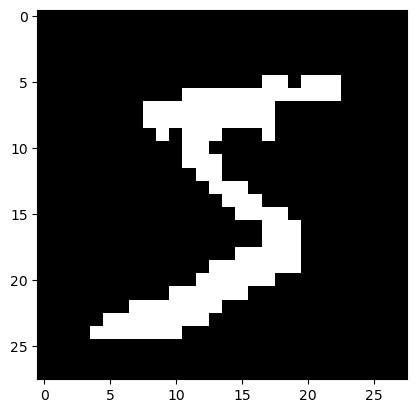

In [12]:
# Посмотрим на пример
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [13]:
# Импортируем инструменты для наивного байеса
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
# Датасеты
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [15]:
# Трейн делится на признаки и метки
X = train_df.iloc[:,1:]
y = train_df.label

In [16]:
# Создаем модель наивного байеса
model = GaussianNB()

In [17]:
# Выделяем часть для валидации
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
# Обучение модели
model.fit(X_train, y_train)
# Предсказание
y_pred = model.predict(X_valid)
# Матрица ошибок и точность 
cm = confusion_matrix(y_valid, y_pred)
acs = accuracy_score(y_valid, y_pred)

0.5652380952380952


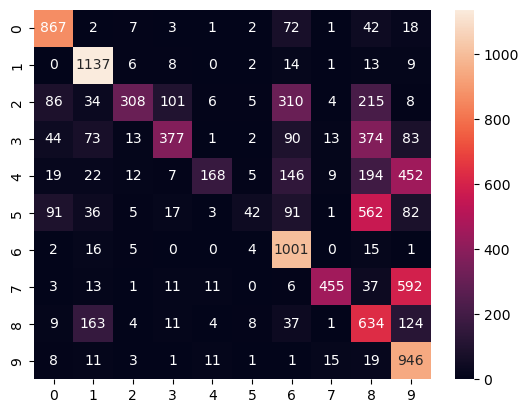

In [18]:
# Выводим результат
sns.heatmap(cm, annot=True, fmt="d")
print(acs)